# Motion Prototype Generation

Example usage of motion prototype generator.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from src.actprogen import effect_based_prototypes

## Data Load

In [2]:
df_data = pd.read_csv("data/motion_samples.csv")
df_data = df_data[df_data['robot_in_map'] == True]
df_data = df_data.sample(n=2000,random_state=42)

## Effect and Motion Dimensions

In [3]:
effect_dims = ['dy','dz']
motion_dims = ['magnitude', 'angle']

## Prototype Generation

In [4]:
prototype_generator = effect_based_prototypes.ActionPrototypes(df_data, motion_dims)
prototype_generator.generate(effect_dimensions=effect_dims, prototypes_per_cluster=5)
print(prototype_generator.action_prototypes)

Max prototypes per cluster:  [1. 4. 5. 4. 1. 4.]
[[521.8232493   28.05258621]
 [855.69786115  83.1302306 ]
 [720.14527626  48.23059289]
 [622.87579586  76.86180538]
 [538.98859094  60.12919277]
 [751.99581917  85.05203027]
 [589.30817831  45.15952687]
 [487.32750664  82.60722202]
 [384.88024815  52.2448484 ]
 [332.24920003  69.51627116]
 [590.70416751  48.07836181]
 [810.95715321  83.18873143]
 [446.97383472  64.60759797]
 [594.11941957  80.32347317]
 [239.82361635  53.66581633]
 [888.32497616  82.88947347]
 [591.76878176  60.07087699]
 [662.06095203  75.6841916 ]]


## Visualitation

In [5]:
colors = ['red', 'green', 'blue', 'magenta', 'yellow', 'pink', 'cyan']

def color_picker(x):
    return colors[x]

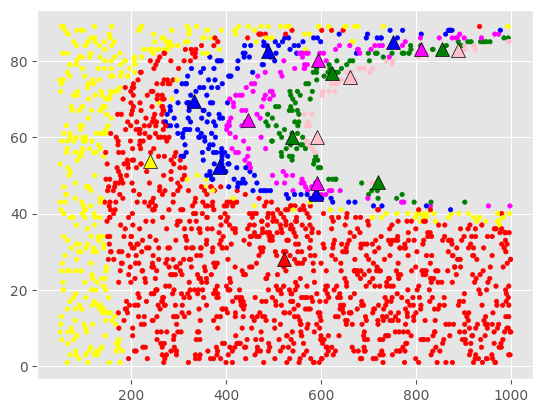

In [6]:
plt.scatter(df_data.magnitude, df_data.angle, c=list(map(color_picker,prototype_generator.m_samples_labeled['cluster_label'])), s=10)

for i, label in enumerate(set(prototype_generator.m_samples_labeled['cluster_label'])):
    local_ap = prototype_generator.prototypes_per_label[label]      
    plt.scatter(local_ap.T[0], local_ap.T[1], marker="^", s=100, color=colors[i], edgecolors='black')
plt.show()